In [244]:
from poker_project.data import prepare
import poker_project.data.holdem as hd
from matplotlib import pyplot as plt
import poker_project.data.visualize as vis
import poker_project.data.analyze as az
import numpy as np


In [243]:
import pandas as pd
import glob
import os
from io import StringIO


In [4]:
# Prepare the data set, return a dictionary of hands, player history, and players in games.
hdb = prepare.prepare_holdem('tourney', '[3, 4]')



In [4]:
hdb

In [66]:
hdb.player.query('timestamp == "825698927"')

,,dealt_num,pos,bet_preflop,bet_flop,bet_turn,bet_river,bank_start,action,amt,card_1,card_2,delta_s,delta,total_delta
name,timestamp,,,,,,,,,,,,,,
AJ,825698927,2,2,Bc,b,bA,-,4980,4980,8000,Kc,9c,1,3020,45772
gambit,825698927,2,1,Br,kc,kcA,-,3020,3020,0,As,Qs,-1,-3020,170947


In [8]:
h = hdb.winning_hands()

In [239]:
hdb.hands.query('timestamp == "828764684"').iloc[0:, 0:12]

,game_num,hand_num,dealt_num,num_flop,flop_pot,num_turn,turn_pot,num_river,river_pot,num_showdown,showdown_pot,card_1
timestamp,,,,,,,,,,,,
828764684,4570,53,2,2,128,2,128,2,256,2,824,6c


In [229]:
x.dropna(subset=['card_1']).query('bet_river != "-" & bet_river != "k" ').iloc[100:130, 0:12]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>name</th>
      <th>dealt_num</th>
      <th>bet_preflop</th>
      <th>bet_flop</th>
      <th>bet_turn</th>
      <th>bet_river</th>
      <th>bank_start</th>
      <th>action</th>
      <th>amt</th>
      <th>card_1</th>
      <th>card_2</th>
      <th>delta_s</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">827982028</th>
      <th>1</th>
      <td>dbarnett</td>
      <td>2</td>
      <td>Br</td>
      <td>k</td>
      <td>k</td>
      <td>kc</td>
      <td>40775</td>
      <td>19200</td>
      <td>0</td>
      <td>As</td>
      <td>5c</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>vomit</td>
      <td>2</td>
      <td>Bc</td>
      <td>k</td>
      <td>k</td>
      <td>b</td>
      <td>59225</td>
      <td>19200</td>
      <td>38400</td>
      <td>Tc</td>
      <td>9h</td>
      <td>1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">828067080</th>
      <th>1</th>
      <td>wantobet</td>
      <td>2</td>
      <td>Bc</td>
      <td>k</td>
      <td>kc</td>
      <td>kc</td>
      <td>3729</td>
      <td>760</td>
      <td>0</td>
      <td>4d</td>
      <td>Kc</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>DocRock2</td>
      <td>2</td>
      <td>Bk</td>
      <td>k</td>
      <td>b</td>
      <td>b</td>
      <td>2271</td>
      <td>760</td>
      <td>1520</td>
      <td>Ac</td>
      <td>2d</td>
      <td>1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">828141272</th>
      <th>1</th>
      <td>TripSixes</td>
      <td>2</td>
      <td>Br</td>
      <td>kc</td>
      <td>kc</td>
      <td>kc</td>
      <td>14590</td>
      <td>2910</td>
      <td>5820</td>
      <td>3d</td>
      <td>3c</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>quantum</td>
      <td>2</td>
      <td>Bc</td>
      <td>b</td>
      <td>b</td>
      <td>bA</td>
      <td>2910</td>
      <td>2910</td>
      <td>0</td>
      <td>Jd</td>
      <td>Qs</td>
      <td>-1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">828327908</th>
      <th>1</th>
      <td>b2z</td>
      <td>2</td>
      <td>Bc</td>
      <td>k</td>
      <td>k</td>
      <td>b</td>
      <td>4666</td>
      <td>640</td>
      <td>974</td>
      <td>Ks</td>
      <td>3h</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>mompike</td>
      <td>2</td>
      <td>Bk</td>
      <td>k</td>
      <td>k</td>
      <td>cA</td>
      <td>334</td>
      <td>334</td>
      <td>0</td>
      <td>Kh</td>
      <td>6s</td>
      <td>-1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">828398489</th>
      <th>1</th>
      <td>AZdAVE</td>
      <td>2</td>
      <td>Bc</td>
      <td>b</td>
      <td>k</td>
      <td>kc</td>
      <td>970</td>
      <td>530</td>
      <td>0</td>
      <td>Ad</td>
      <td>6h</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>2</td>
      <td>Bk</td>
      <td>c</td>
      <td>k</td>
      <td>bA</td>
      <td>530</td>
      <td>530</td>
      <td>1060</td>
      <td>3h</td>
      <td>Jd</td>
      <td>1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">828516434</th>
      <th>1</th>
      <td>jambalaya</td>
      <td>2</td>
      <td>Bc</td>
      <td>k</td>
      <td>k</td>
      <td>kc</td>
      <td>16420</td>
      <td>5120</td>
      <td>0</td>
      <td>4h</

- used hole cards (games that went to end) because we have consistent dataset (games that went to end)
- does not give information about hands that did not go to end
- proves that there is a strategy, possibly exploitable

1. sb 32, bb 64 : 128 : 128
2. 0 0 : 0 : 128
3. 64 64 : 128 : 256
4. x [64, 283] 284 284 : 812

In [9]:
h = hdb.player.query('dealt_num == 2').reset_index().groupby('timestamp').filter(lambda x: x.shape[0] == 2).set_index(['timestamp', 'pos']).sort_index().dropna(subset=['card_1'])

In [10]:
d = h

In [11]:
h2 = hdb.player.query('dealt_num == 2').reset_index().groupby('timestamp').filter(lambda x: x.shape[0] == 2).set_index(['timestamp', 'pos']).sort_index()

In [84]:
hdb.hands.query('timestamp == "825709487"').iloc[0:, 0:10]

,game_num,hand_num,dealt_num,num_flop,flop_pot,num_turn,turn_pot,num_river,river_pot,num_showdown
timestamp,,,,,,,,,,
825709487,3903,68,2,2,64,0,0,2,1320,2


In [61]:
d.iloc[0:, 0:10].reset_index().set_index(['timestamp', 'pos']).sort_index()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>name</th>
      <th>dealt_num</th>
      <th>bet_preflop</th>
      <th>bet_flop</th>
      <th>bet_turn</th>
      <th>bet_river</th>
      <th>bank_start</th>
      <th>action</th>
      <th>amt</th>
      <th>card_1</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">825698927</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Br</td>
      <td>kc</td>
      <td>kcA</td>
      <td>-</td>
      <td>3020</td>
      <td>3020</td>
      <td>0</td>
      <td>As</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>2</td>
      <td>Bc</td>
      <td>b</td>
      <td>bA</td>
      <td>-</td>
      <td>4980</td>
      <td>4980</td>
      <td>8000</td>
      <td>Kc</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704514</th>
      <th>1</th>
      <td>suckfish</td>
      <td>2</td>
      <td>Br</td>
      <td>bA</td>
      <td>-</td>
      <td>-</td>
      <td>1700</td>
      <td>1700</td>
      <td>3400</td>
      <td>Ad</td>
    </tr>
    <tr>
      <th>2</th>
      <td>dtm</td>
      <td>2</td>
      <td>Bc</td>
      <td>c</td>
      <td>-</td>
      <td>-</td>
      <td>9300</td>
      <td>1700</td>
      <td>0</td>
      <td>As</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704536</th>
      <th>1</th>
      <td>dtm</td>
      <td>2</td>
      <td>Brc</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>7600</td>
      <td>3400</td>
      <td>0</td>
      <td>Ac</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>2</td>
      <td>BrA</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3400</td>
      <td>3400</td>
      <td>6800</td>
      <td>Qd</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704755</th>
      <th>1</th>
      <td>dtm</td>
      <td>2</td>
      <td>Brc</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>7699</td>
      <td>3301</td>
      <td>6602</td>
      <td>Ks</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>2</td>
      <td>BrA</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3301</td>
      <td>3301</td>
      <td>0</td>
      <td>Qd</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714706</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>2</td>
      <td>Br</td>
      <td>b</td>
      <td>-</td>
      <td>-</td>
      <td>6130</td>
      <td>1640</td>
      <td>270</td>
      <td>Th</td>
    </tr>
    <tr>
      <th>2</th>
      <td>andy</td>
      <td>2</td>
      <td>Bc</td>
      <td>cA</td>
      <td>-</td>
      <td>-</td>
      <td>1370</td>
      <td>1370</td>
      <td>2740</td>
      <td>Qc</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714773</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>2</td>
      <td>Br</td>
      <td>k</td>
      <td>bc</td>
      <td>-</td>
      <td>3780</td>
      <td>3720</td>
      <td>3720</td>
      <td>6s</td>
    </tr>
    <tr>
      <th>2</th>
      <td>andy</td>
      <td>2</td>
      <td>Bc</td>
      <td>k</td>
      <td>rA</td>
      <td>-</td>
      <td>3720</td>
      <td>3720</td>
      <td>3720</td>
      <td>7s</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714943</th>
      <th>1</th>
      <td>andy</td>
      <td>2</td>
      <td>Br</td>
      <td>bA</td>
      <td>-</td>
      <td>-</td>
      <td>3080</td>
   

In [13]:
d = h2

In [15]:
d['stack_perc'] = d['action'] / d['bank_start']

In [12]:
gb = d.groupby('delta_s')

In [289]:
def vvv(x, y):
    if x < y:
        return pd.Series([x, x])
    if x > y:
        return pd.Series([x, y])

In [17]:
a[['action', 'amt']].apply(lambda x: vvv(x['amt'], x['action']))

NameError: ("name 'vvv' is not defined", 'occurred at index action')

In [16]:
a = d[d.amt / 2 == d.action] #= d.where(d.delta_s > -1)['amt']
a['delta'] = a['amt'] - a['action']

v = d[(d.amt / 2 != d.action) & d.delta_s > 0]
v['delta'] = v['amt']


b = d.query('delta_s == 0') #= d.where(d.delta_s > -1)['amt']
b['delta'] = b['delta_s']

c = d.query('delta_s == -1') #= d.where(d.delta_s > -1)['amt']
c['delta'] = -1 * c['action']

/Users/zack/anaconda3/envs/EECE2300/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/zack/anaconda3/envs/EECE2300/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/zack/anaconda3/envs/EECE2300/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/zack/anaconda3/envs/EECE2300/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [18]:
x = pd.concat([a, b, c, v]).sort_index()

In [19]:
x = x.query('delta_s * delta > 0 | (delta_s == 0 & delta == 0)')#.iloc[0:, 0:14]

In [294]:
x.iloc[0:, 0:10]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>name</th>
      <th>dealt_num</th>
      <th>bet_preflop</th>
      <th>bet_flop</th>
      <th>bet_turn</th>
      <th>bet_river</th>
      <th>bank_start</th>
      <th>action</th>
      <th>amt</th>
      <th>card_1</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">825698881</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4300</td>
      <td>160</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>2</td>
      <td>B</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3700</td>
      <td>320</td>
      <td>480</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698897</th>
      <th>1</th>
      <td>AJ</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3860</td>
      <td>160</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>gambit</td>
      <td>2</td>
      <td>B</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4140</td>
      <td>320</td>
      <td>480</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698898</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4300</td>
      <td>160</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>2</td>
      <td>B</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3700</td>
      <td>320</td>
      <td>480</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698899</th>
      <th>1</th>
      <td>AJ</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3860</td>
      <td>160</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>gambit</td>
      <td>2</td>
      <td>B</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4140</td>
      <td>320</td>
      <td>480</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698903</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Br</td>
      <td>kf</td>
      <td>-</td>
      <td>-</td>
      <td>4300</td>
      <td>960</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>2</td>
      <td>Bc</td>
      <td>bA</td>
      <td>-</td>
      <td>-</td>
      <td>3700</td>
      <td>3700</td>
      <td>4660</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698917</th>
      <th>1</th>
      <td>AJ</td>
      <td>2</td>
      <td>Br</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4660</td>
      <td>960</td>
      <td>1280</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>gambit</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3340</td>
      <td>320</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698921</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3020</td>
      <td>160</td>
      <td>

In [20]:
x['delta_perc'] = x['delta'] / x['bank_start']

In [38]:
y = x

In [23]:
x.iloc[:, 0:10].sort_values(['timestamp', 'pos'])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>name</th>
      <th>dealt_num</th>
      <th>bet_preflop</th>
      <th>bet_flop</th>
      <th>bet_turn</th>
      <th>bet_river</th>
      <th>bank_start</th>
      <th>action</th>
      <th>amt</th>
      <th>card_1</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">825698881</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4300</td>
      <td>160</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>2</td>
      <td>B</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3700</td>
      <td>320</td>
      <td>480</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698897</th>
      <th>1</th>
      <td>AJ</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3860</td>
      <td>160</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>gambit</td>
      <td>2</td>
      <td>B</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4140</td>
      <td>320</td>
      <td>480</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698898</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4300</td>
      <td>160</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>2</td>
      <td>B</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3700</td>
      <td>320</td>
      <td>480</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698899</th>
      <th>1</th>
      <td>AJ</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3860</td>
      <td>160</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>gambit</td>
      <td>2</td>
      <td>B</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4140</td>
      <td>320</td>
      <td>480</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698903</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Br</td>
      <td>kf</td>
      <td>-</td>
      <td>-</td>
      <td>4300</td>
      <td>960</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>2</td>
      <td>Bc</td>
      <td>bA</td>
      <td>-</td>
      <td>-</td>
      <td>3700</td>
      <td>3700</td>
      <td>4660</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698917</th>
      <th>1</th>
      <td>AJ</td>
      <td>2</td>
      <td>Br</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4660</td>
      <td>960</td>
      <td>1280</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>gambit</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3340</td>
      <td>320</td>
      <td>0</td>
      <td>None</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825698921</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Bf</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3020</td>
      <td>160</td>
      <td>

In [39]:
y = y.dropna(subset=['card_1'])

In [47]:
y.iloc[0:, 0:12]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>name</th>
      <th>dealt_num</th>
      <th>bet_preflop</th>
      <th>bet_flop</th>
      <th>bet_turn</th>
      <th>bet_river</th>
      <th>bank_start</th>
      <th>action</th>
      <th>amt</th>
      <th>card_1</th>
      <th>card_2</th>
      <th>delta_s</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">825698927</th>
      <th>1</th>
      <td>gambit</td>
      <td>2</td>
      <td>Br</td>
      <td>kc</td>
      <td>kcA</td>
      <td>-</td>
      <td>3020</td>
      <td>3020</td>
      <td>0</td>
      <td>As</td>
      <td>Qs</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>2</td>
      <td>Bc</td>
      <td>b</td>
      <td>bA</td>
      <td>-</td>
      <td>4980</td>
      <td>4980</td>
      <td>8000</td>
      <td>Kc</td>
      <td>9c</td>
      <td>1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704514</th>
      <th>1</th>
      <td>suckfish</td>
      <td>2</td>
      <td>Br</td>
      <td>bA</td>
      <td>-</td>
      <td>-</td>
      <td>1700</td>
      <td>1700</td>
      <td>3400</td>
      <td>Ad</td>
      <td>Td</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>dtm</td>
      <td>2</td>
      <td>Bc</td>
      <td>c</td>
      <td>-</td>
      <td>-</td>
      <td>9300</td>
      <td>1700</td>
      <td>0</td>
      <td>As</td>
      <td>3c</td>
      <td>-1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704536</th>
      <th>1</th>
      <td>dtm</td>
      <td>2</td>
      <td>Brc</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>7600</td>
      <td>3400</td>
      <td>0</td>
      <td>Ac</td>
      <td>3s</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>2</td>
      <td>BrA</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3400</td>
      <td>3400</td>
      <td>6800</td>
      <td>Qd</td>
      <td>As</td>
      <td>1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704755</th>
      <th>1</th>
      <td>dtm</td>
      <td>2</td>
      <td>Brc</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>7699</td>
      <td>3301</td>
      <td>6602</td>
      <td>Ks</td>
      <td>Jh</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>2</td>
      <td>BrA</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>3301</td>
      <td>3301</td>
      <td>0</td>
      <td>Qd</td>
      <td>Th</td>
      <td>-1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714706</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>2</td>
      <td>Br</td>
      <td>b</td>
      <td>-</td>
      <td>-</td>
      <td>6130</td>
      <td>1640</td>
      <td>270</td>
      <td>Th</td>
      <td>Jh</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>andy</td>
      <td>2</td>
      <td>Bc</td>
      <td>cA</td>
      <td>-</td>
      <td>-</td>
      <td>1370</td>
      <td>1370</td>
      <td>2740</td>
      <td>Qc</td>
      <td>8d</td>
      <td>1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714773</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>2</td>
      <td>Br</td>
      <td>k</td>
      <td>bc</td>
      <td>-</td>
      <td>3780</td>
      <td>3720</td>
      <td>3720</td>
      <td>6s</td>
     

In [25]:
y[['bank_start', 'action', 'delta', 'delta_perc']] = y[['bank_start', 'action', 'delta', 'delta_perc']].apply(lambda x: pd.to_numeric(x, downcast='unsigned'))

In [26]:
y[['bank_start', 'action', 'delta', 'delta_perc']] = y[['bank_start', 'action', 'delta', 'delta_perc']].apply(lambda x: pd.to_numeric(x, downcast='unsigned'))

In [43]:
y2 = y

In [44]:
y2 = y.drop(y.columns.difference(['name', 'bank_start', 'action', 'delta', 'delta_perc', 'card_1', 'card_2']), 1)

In [50]:
y = y2

In [52]:
y['c1_val'] = y['card_1'].apply(lambda x: x[0])
y['c2_val'] = y['card_2'].apply(lambda x: x[0])
y['c1_suit'] = y['card_1'].apply(lambda x: x[1])
y['c2_suit'] = y['card_2'].apply(lambda x: x[1])

,timestamp,pos,name,bank_start,action,card_1,card_2,delta,delta_perc,c1_val,c2_val,c1_suit,c2_suit
0,825698927,1,gambit,3020,3020,As,Qs,-3020,-1.000000,A,Q,s,s
1,825698927,2,AJ,4980,4980,Kc,9c,8000,1.606426,K,9,c,c
2,825704514,1,suckfish,1700,1700,Ad,Td,1700,1.000000,A,T,d,d
3,825704514,2,dtm,9300,1700,As,3c,-1700,-0.182796,A,3,s,c
4,825704536,1,dtm,7600,3400,Ac,3s,-3400,-0.447368,A,3,c,s
5,825704536,2,suckfish,3400,3400,Qd,As,3400,1.000000,Q,A,d,s
6,825704755,1,dtm,7699,3301,Ks,Jh,3301,0.428757,K,J,s,h
7,825704755,2,suckfish,3301,3301,Qd,Th,-3301,-1.000000,Q,T,d,h
8,825714706,1,DocRock2,6130,1640,Th,Jh,-1640,-0.267537,T,J,h,h
9,825714706,2,andy,1370,1370,Qc,8d,1370,1.000000,Q,8,c,d


In [56]:
z = y.reset_index().groupby(['c1_val', 'c2_val']).mean().reset_index()

In [58]:
z

,c1_val,c2_val,pos,bank_start,action,delta,delta_perc
0,2,2,1.457944,13488.971963,7811.261682,-509.803738,0.032362
1,2,3,1.568627,12592.235294,3763.549020,-1295.862745,-0.136415
2,2,4,1.709091,16498.563636,5472.309091,-2030.636364,0.029422
3,2,5,1.820513,20163.076923,4163.102564,-2909.256410,-0.213004
4,2,6,1.611111,15677.972222,3629.583333,-2122.861111,-0.166516
5,2,7,1.780488,27325.292683,2726.804878,150.390244,0.007161
6,2,8,1.658537,9708.097561,2879.073171,-968.634146,-0.054480
7,2,9,1.568182,13479.204545,2824.636364,1608.772727,-0.057153
8,2,A,1.514286,11473.514286,5683.414286,-2077.992857,-0.099148
9,2,J,1.581395,13908.093023,3951.162791,-612.906977,-0.042770


In [59]:
def c_n(x):
    if x == 'T':
        return 10
    if x == 'J':
        return 11
    if x == 'Q':
        return 12
    if x == 'K':
        return 13
    if x == 'A':
        return 14
    else:
        return int(x)

In [60]:
def n_c(x):
    if x == 10:
        return "T"
    if x == 11:
        return 'J'
    if x == 12:
        return 'Q'
    if x == 13:
        return 'K'
    if x == 14:
        return 'A'
    else:
        return str(x)

In [61]:
y['c1_val'] = y['c1_val'].apply(lambda x: c_n(x))#.apply(lambda x: pd.to_numeric(x))
y['c2_val'] = y['c2_val'].apply(lambda x: c_n(x))#.apply(lambda x: pd.to_numeric(x))

In [62]:
y['hand'] = y.apply(lambda x: sorted(list([x['c1_val'], x['c2_val']])), axis=1)

In [63]:
y['hand'] = y['hand'].apply(lambda x: "".join([n_c(g) for g in x]))

In [66]:
y

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>name</th>
      <th>bank_start</th>
      <th>action</th>
      <th>card_1</th>
      <th>card_2</th>
      <th>delta</th>
      <th>delta_perc</th>
      <th>c1_val</th>
      <th>c2_val</th>
      <th>c1_suit</th>
      <th>c2_suit</th>
      <th>hand</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">825698927</th>
      <th>1</th>
      <td>gambit</td>
      <td>3020</td>
      <td>3020</td>
      <td>As</td>
      <td>Qs</td>
      <td>-3020</td>
      <td>-1.000000</td>
      <td>14</td>
      <td>12</td>
      <td>s</td>
      <td>s</td>
      <td>QA</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>4980</td>
      <td>4980</td>
      <td>Kc</td>
      <td>9c</td>
      <td>8000</td>
      <td>1.606426</td>
      <td>13</td>
      <td>9</td>
      <td>c</td>
      <td>c</td>
      <td>9K</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704514</th>
      <th>1</th>
      <td>suckfish</td>
      <td>1700</td>
      <td>1700</td>
      <td>Ad</td>
      <td>Td</td>
      <td>1700</td>
      <td>1.000000</td>
      <td>14</td>
      <td>10</td>
      <td>d</td>
      <td>d</td>
      <td>TA</td>
    </tr>
    <tr>
      <th>2</th>
      <td>dtm</td>
      <td>9300</td>
      <td>1700</td>
      <td>As</td>
      <td>3c</td>
      <td>-1700</td>
      <td>-0.182796</td>
      <td>14</td>
      <td>3</td>
      <td>s</td>
      <td>c</td>
      <td>3A</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704536</th>
      <th>1</th>
      <td>dtm</td>
      <td>7600</td>
      <td>3400</td>
      <td>Ac</td>
      <td>3s</td>
      <td>-3400</td>
      <td>-0.447368</td>
      <td>14</td>
      <td>3</td>
      <td>c</td>
      <td>s</td>
      <td>3A</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>3400</td>
      <td>3400</td>
      <td>Qd</td>
      <td>As</td>
      <td>3400</td>
      <td>1.000000</td>
      <td>12</td>
      <td>14</td>
      <td>d</td>
      <td>s</td>
      <td>QA</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704755</th>
      <th>1</th>
      <td>dtm</td>
      <td>7699</td>
      <td>3301</td>
      <td>Ks</td>
      <td>Jh</td>
      <td>3301</td>
      <td>0.428757</td>
      <td>13</td>
      <td>11</td>
      <td>s</td>
      <td>h</td>
      <td>JK</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>3301</td>
      <td>3301</td>
      <td>Qd</td>
      <td>Th</td>
      <td>-3301</td>
      <td>-1.000000</td>
      <td>12</td>
      <td>10</td>
      <td>d</td>
      <td>h</td>
      <td>TQ</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714706</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>6130</td>
      <td>1640</td>
      <td>Th</td>
      <td>Jh</td>
      <td>-1640</td>
      <td>-0.267537</td>
      <td>10</td>
      <td>11</td>
      <td>h</td>
      <td>h</td>
      <td>TJ</td>
    </tr>
    <tr>
      <th>2</th>
      <td>andy</td>
      <td>1370</td>
      <td>1370</td>
      <td>Qc</td>
      <td>8d</td>
      <td>1370</td>
      <td>1.000000</td>
      <td>12</td>
      <td>8</td>
      <td>c</td>
      <td>d</td>
      <td>8Q</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714773</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>3780</td>
      <td>3720</td>
      <td>6s</td>
      <td>7c</td>
      <td>

In [75]:
y

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>name</th>
      <th>bank_start</th>
      <th>action</th>
      <th>card_1</th>
      <th>card_2</th>
      <th>delta</th>
      <th>delta_perc</th>
      <th>c1_val</th>
      <th>c2_val</th>
      <th>c1_suit</th>
      <th>c2_suit</th>
      <th>hand</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">825698927</th>
      <th>1</th>
      <td>gambit</td>
      <td>3020</td>
      <td>3020</td>
      <td>As</td>
      <td>Qs</td>
      <td>-3020</td>
      <td>-1.000000</td>
      <td>14</td>
      <td>12</td>
      <td>s</td>
      <td>s</td>
      <td>QA</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>4980</td>
      <td>4980</td>
      <td>Kc</td>
      <td>9c</td>
      <td>8000</td>
      <td>1.606426</td>
      <td>13</td>
      <td>9</td>
      <td>c</td>
      <td>c</td>
      <td>9K</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704514</th>
      <th>1</th>
      <td>suckfish</td>
      <td>1700</td>
      <td>1700</td>
      <td>Ad</td>
      <td>Td</td>
      <td>1700</td>
      <td>1.000000</td>
      <td>14</td>
      <td>10</td>
      <td>d</td>
      <td>d</td>
      <td>TA</td>
    </tr>
    <tr>
      <th>2</th>
      <td>dtm</td>
      <td>9300</td>
      <td>1700</td>
      <td>As</td>
      <td>3c</td>
      <td>-1700</td>
      <td>-0.182796</td>
      <td>14</td>
      <td>3</td>
      <td>s</td>
      <td>c</td>
      <td>3A</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704536</th>
      <th>1</th>
      <td>dtm</td>
      <td>7600</td>
      <td>3400</td>
      <td>Ac</td>
      <td>3s</td>
      <td>-3400</td>
      <td>-0.447368</td>
      <td>14</td>
      <td>3</td>
      <td>c</td>
      <td>s</td>
      <td>3A</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>3400</td>
      <td>3400</td>
      <td>Qd</td>
      <td>As</td>
      <td>3400</td>
      <td>1.000000</td>
      <td>12</td>
      <td>14</td>
      <td>d</td>
      <td>s</td>
      <td>QA</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704755</th>
      <th>1</th>
      <td>dtm</td>
      <td>7699</td>
      <td>3301</td>
      <td>Ks</td>
      <td>Jh</td>
      <td>3301</td>
      <td>0.428757</td>
      <td>13</td>
      <td>11</td>
      <td>s</td>
      <td>h</td>
      <td>JK</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>3301</td>
      <td>3301</td>
      <td>Qd</td>
      <td>Th</td>
      <td>-3301</td>
      <td>-1.000000</td>
      <td>12</td>
      <td>10</td>
      <td>d</td>
      <td>h</td>
      <td>TQ</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714706</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>6130</td>
      <td>1640</td>
      <td>Th</td>
      <td>Jh</td>
      <td>-1640</td>
      <td>-0.267537</td>
      <td>10</td>
      <td>11</td>
      <td>h</td>
      <td>h</td>
      <td>TJ</td>
    </tr>
    <tr>
      <th>2</th>
      <td>andy</td>
      <td>1370</td>
      <td>1370</td>
      <td>Qc</td>
      <td>8d</td>
      <td>1370</td>
      <td>1.000000</td>
      <td>12</td>
      <td>8</td>
      <td>c</td>
      <td>d</td>
      <td>8Q</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714773</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>3780</td>
      <td>3720</td>
      <td>6s</td>
      <td>7c</td>
      <td>

In [77]:
z

,c1_val,c2_val,pos,bank_start,action,delta,delta_perc
0,2,2,1.457944,13488.971963,7811.261682,-509.803738,0.032362
1,2,3,1.568627,12592.235294,3763.549020,-1295.862745,-0.136415
2,2,4,1.709091,16498.563636,5472.309091,-2030.636364,0.029422
3,2,5,1.820513,20163.076923,4163.102564,-2909.256410,-0.213004
4,2,6,1.611111,15677.972222,3629.583333,-2122.861111,-0.166516
5,2,7,1.780488,27325.292683,2726.804878,150.390244,0.007161
6,2,8,1.658537,9708.097561,2879.073171,-968.634146,-0.054480
7,2,9,1.568182,13479.204545,2824.636364,1608.772727,-0.057153
8,2,A,1.514286,11473.514286,5683.414286,-2077.992857,-0.099148
9,2,J,1.581395,13908.093023,3951.162791,-612.906977,-0.042770


In [72]:
y2 = y2.drop(columns=['dealt_num', 'bet_preflop', 'bet_flop', 'bet_turn', 'bet_river', 'delta_s', 'total_delta', 'amt', 'stack_perc'])

KeyError: "['dealt_num' 'bet_preflop' 'bet_flop' 'bet_turn' 'bet_river' 'delta_s'\n 'total_delta' 'amt' 'stack_perc'] not found in axis"

In [227]:
y = y.drop(columns=['total_delta', 'amt'])

KeyError: "['total_delta' 'amt'] not found in axis"

In [231]:
y = y.drop(columns=['stack_perc'])

In [78]:
y.loc[:, 'delta_perc'] = y.loc[:, 'delta_perc'].apply(lambda x: pd.to_numeric(x, downcast='unsigned'))

In [79]:
y3 = y2.groupby('hand').mean()['delta_perc'].sort_index().reset_index()

In [80]:
y3['c1'] = y3['hand'].apply(lambda x: x[0])
y3['c2'] = y3['hand'].apply(lambda x: x[1])

In [81]:
y3

,hand,delta_perc,c1,c2
0,22,0.032362,2,2
1,23,-0.179203,2,3
2,24,-0.046300,2,4
3,25,-0.165302,2,5
4,26,-0.195242,2,6
5,27,-0.069698,2,7
6,28,-0.107870,2,8
7,29,-0.060579,2,9
8,2A,-0.113509,2,A
9,2J,-0.012068,2,J


In [82]:
y4 = y3[['c1', 'c2', 'delta_perc']]

In [89]:
z2 = z.loc[:, ['c1_val', 'c2_val', 'delta_perc']]

In [90]:
z2['c1_val'] = z2['c1_val'].apply(lambda x: c_n(x))
z2['c2_val'] = z2['c2_val'].apply(lambda x: c_n(x))

In [91]:
z2 = z2.sort_values(['c1_val', 'c2_val'])

In [92]:
z2['c1_val'] = z2['c1_val'].apply(lambda x: n_c(x))
z2['c2_val'] = z2['c2_val'].apply(lambda x: n_c(x))

In [132]:
z

,hand,delta_perc,c1,c2
0,22,0.032362,2,2
1,23,-0.179203,2,3
2,24,-0.046300,2,4
3,25,-0.165302,2,5
4,26,-0.195242,2,6
5,27,-0.069698,2,7
6,28,-0.107870,2,8
7,29,-0.060579,2,9
8,2A,-0.113509,2,14
9,2J,-0.012068,2,11


In [113]:
z['c1_val'] = z['c1_val'].apply(lambda x: c_n(x))
z['c2_val'] = z['c2_val'].apply(lambda x: c_n(x))

In [124]:
z = y.groupby('hand').mean()['delta_perc'].reset_index()

In [125]:
z['c1'] = z['hand'].apply(lambda x: x[0])
z['c2'] = z['hand'].apply(lambda x: x[1])

In [126]:
z['c1'] = z['hand'].apply(lambda x: x[0])
z['c2'] = z['hand'].apply(lambda x: x[1])

,hand,delta_perc,c1,c2
0,22,0.032362,2,2
1,23,-0.179203,2,3
2,24,-0.046300,2,4
3,25,-0.165302,2,5
4,26,-0.195242,2,6
5,27,-0.069698,2,7
6,28,-0.107870,2,8
7,29,-0.060579,2,9
8,2A,-0.113509,2,A
9,2J,-0.012068,2,J


In [363]:
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.les_mis import data


In [369]:
from bokeh.models import ColumnDataSource

In [390]:
y4['c1_n'] = y4['c1'].apply(lambda x: c_n(x))#.apply(lambda x: pd.to_numeric(x))
y4['c2_n'] = y4['c2'].apply(lambda x: c_n(x))#.apply(lambda x: pd.to_numeric(x))

In [127]:
z2 = z

In [128]:
z2 = z2.pivot(index='c1', columns='c2', values='delta_perc')

In [133]:
z2 = z

In [134]:
z2

,hand,delta_perc,c1,c2
0,22,0.032362,2,2
1,23,-0.179203,2,3
2,24,-0.046300,2,4
3,25,-0.165302,2,5
4,26,-0.195242,2,6
5,27,-0.069698,2,7
6,28,-0.107870,2,8
7,29,-0.060579,2,9
8,2A,-0.113509,2,14
9,2J,-0.012068,2,11


In [137]:
z2['c1'] = z2['c1'].apply(lambda x: c_n(x))
z2['c2'] = z2['c2'].apply(lambda x: c_n(x))
z2 = z2.sort_values(['c1', 'c2'])

In [139]:
z2 = z2.pivot(index='c1', columns='c2', values='delta_perc')

In [140]:
z2

c2,2,3,4,5,6,7,8,9,10,11,12,13,14
c1,,,,,,,,,,,,,
2,0.032362,-0.179203,-0.046300,-0.165302,-0.195242,-0.069698,-0.107870,-0.060579,-0.090787,-0.012068,-0.034964,0.025353,-0.113509
3,NaN,0.081326,-0.110128,-0.061224,-0.006471,-0.104053,-0.004278,0.014425,-0.092792,-0.012868,0.025064,-0.025637,-0.017438
4,NaN,NaN,0.086283,-0.110977,-0.193826,-0.113929,0.025809,-0.073234,-0.006647,0.034741,-0.014052,0.020331,-0.026022
5,NaN,NaN,NaN,0.012617,-0.039958,-0.056274,-0.077581,-0.026783,-0.075071,-0.044694,-0.115041,-0.060786,0.033032
6,NaN,NaN,NaN,NaN,0.019681,0.030274,-0.068138,-0.031266,-0.132795,-0.007710,-0.021076,-0.020488,0.040592
7,NaN,NaN,NaN,NaN,NaN,0.133316,-0.072259,0.008325,0.014357,-0.071074,-0.119164,-0.026559,0.097493
8,NaN,NaN,NaN,NaN,NaN,NaN,0.226617,-0.086924,0.019638,-0.038536,0.002616,0.014785,0.044402
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148746,-0.014346,-0.047567,0.081686,0.050939,0.049042
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240444,0.071626,-0.058742,0.024582,0.160008


In [149]:
z2 = z2.fillna(0)

In [160]:
z3 = np.tri(13, 13, -1) * z2.T + z2

In [161]:
z3.columns = z3.columns.map(lambda x: n_c(x))
z3.index = z3.index.map(lambda x: n_c(x))

In [162]:
z3

c1,2,3,4,5,6,7,8,9,T,J,Q,K,A
c2,,,,,,,,,,,,,
2,0.032362,-0.179203,-0.046300,-0.165302,-0.195242,-0.069698,-0.107870,-0.060579,-0.090787,-0.012068,-0.034964,0.025353,-0.113509
3,-0.179203,0.081326,-0.110128,-0.061224,-0.006471,-0.104053,-0.004278,0.014425,-0.092792,-0.012868,0.025064,-0.025637,-0.017438
4,-0.046300,-0.110128,0.086283,-0.110977,-0.193826,-0.113929,0.025809,-0.073234,-0.006647,0.034741,-0.014052,0.020331,-0.026022
5,-0.165302,-0.061224,-0.110977,0.012617,-0.039958,-0.056274,-0.077581,-0.026783,-0.075071,-0.044694,-0.115041,-0.060786,0.033032
6,-0.195242,-0.006471,-0.193826,-0.039958,0.019681,0.030274,-0.068138,-0.031266,-0.132795,-0.007710,-0.021076,-0.020488,0.040592
7,-0.069698,-0.104053,-0.113929,-0.056274,0.030274,0.133316,-0.072259,0.008325,0.014357,-0.071074,-0.119164,-0.026559,0.097493
8,-0.107870,-0.004278,0.025809,-0.077581,-0.068138,-0.072259,0.226617,-0.086924,0.019638,-0.038536,0.002616,0.014785,0.044402
9,-0.060579,0.014425,-0.073234,-0.026783,-0.031266,0.008325,-0.086924,0.148746,-0.014346,-0.047567,0.081686,0.050939,0.049042
T,-0.090787,-0.092792,-0.006647,-0.075071,-0.132795,0.014357,0.019638,-0.014346,0.240444,0.071626,-0.058742,0.024582,0.160008


In [393]:
y5 = y4.sort_values(by=['c1_n', 'c2_n']).loc[:, ['c1_n', 'c2_n', 'delta_perc']]

In [552]:
y7 = y7.reset_index()

In [553]:
y7['c1'] = y7['hand'].apply(lambda x: x[0])
y7['c2'] = y7['hand'].apply(lambda x: x[1])

In [584]:
y7['c1'] = y7['c1'].apply(lambda x: c_n(x))#.apply(lambda x: pd.to_numeric(x))
y7['c2'] = y7['c2'].apply(lambda x: c_n(x))#.apply(lambda x: pd.to_numeric(x))
y7

,hand,count,c1,c2
0,22,107,2,2
1,23,110,2,3
2,24,108,2,4
3,25,82,2,5
4,26,86,2,6
5,27,79,2,7
6,28,79,2,8
7,29,81,2,9
8,2A,277,2,14
9,2J,98,2,11


In [587]:
y8 = y7.sort_values(['c1', 'c2'])
y8

,hand,count,c1,c2
0,22,107,2,2
1,23,110,2,3
2,24,108,2,4
3,25,82,2,5
4,26,86,2,6
5,27,79,2,7
6,28,79,2,8
7,29,81,2,9
12,2T,93,2,10
9,2J,98,2,11


In [588]:
y8 = y7.pivot(index='c1', columns='c2', values='count')

In [634]:
p = np.ones((13, 13))
p = p * (16 / 1326)
t = np.tri(13, 13)
np.fill_diagonal(p, 0)

In [645]:
full2.sum().sum()

30026.0

In [646]:
p = p * 30026

In [647]:
t = (t * np.tri(13, 13).T) * (6 / 1326)
z = p + t

In [639]:
z

array([[9.26452546e-08, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02],
       [1.20663650e-02, 9.26452546e-08, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02],
       [1.20663650e-02, 1.20663650e-02, 9.26452546e-08, 1.20663650e-02,
        1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02],
       [1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 9.26452546e-08,
        1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02, 1.20663650e-02, 1.20663650e-02, 1.20663650e-02,
        1.20663650e-02],
       [1.20663650e-02, 1.20663650e-

In [591]:
y8.index = y8.index.map(lambda x: n_c(x))#.apply(lambda x: pd.to_numeric(x))
y8.columns = y8.columns.map(lambda x: n_c(x))#.apply(lambda x: pd.to_numeric(x))

In [568]:
y8 = y8.sort_index()

In [ ]:
y8.index = y8.index.map(int)
y8.columns = y8.columns.map(int)

In [592]:
y8 = y8.fillna(0)
full2 = y8.T + y8 * (np.tri(13, 13, -1).T)

In [476]:
y6.index = y6.index.map(int)
y6.columns = y6.columns.map(int)

In [574]:
y8

,2,3,4,5,6,7,8,9,10,11,12,13,14
c1,,,,,,,,,,,,,
2,107.0,110.0,108.0,82.0,86.0,79.0,79.0,81.0,277.0,98.0,208.0,124.0,93.0
3,0.0,118.0,100.0,97.0,95.0,106.0,73.0,97.0,255.0,126.0,216.0,127.0,107.0
4,0.0,0.0,127.0,131.0,96.0,98.0,93.0,94.0,286.0,115.0,181.0,155.0,93.0
5,0.0,0.0,0.0,122.0,157.0,96.0,103.0,101.0,288.0,129.0,219.0,147.0,110.0
6,0.0,0.0,0.0,0.0,130.0,173.0,147.0,122.0,246.0,123.0,223.0,159.0,117.0
7,0.0,0.0,0.0,0.0,0.0,133.0,181.0,150.0,311.0,138.0,255.0,180.0,147.0
8,0.0,0.0,0.0,0.0,0.0,0.0,134.0,233.0,322.0,219.0,245.0,188.0,196.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,293.0,244.0,264.0,257.0,253.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.0,274.0,312.0,305.0,137.0


In [452]:
y6 = y6.fillna(0)

In [547]:
y6 = y2.groupby('hand').count()
y6['count'] = y6['name']
y7 = y6['count']

In [551]:
y7.reset_index()

,hand,count
0,22,107
1,23,110
2,24,108
3,25,82
4,26,86
5,27,79
6,28,79
7,29,81
8,2A,277
9,2J,98


In [472]:
full = y6.T + y6 * (np.tri(13, 13, -1).T)

In [163]:
plt.style.use('default')

In [166]:
v = z3.values

In [167]:
fig, ax = plt.subplots()
im = ax.imshow(v)

# We want to show all ticks...
ax.set_xticks(np.arange(len(z3.index.values)))
ax.set_yticks(np.arange(len(z3.columns.values)))
# ... and label them with the respective list entries
ax.set_xticklabels(z3.index.values)
ax.set_yticklabels(z3.columns.values)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(y6.index.values)):
#     for j in range(len(y6.columns.values)):
#         text = ax.text(j, i, y6.values[i, j],
#                        ha="center", va="center", color="w")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Count", rotation=-90, va="bottom")
ax.set_title("Frequency of hands in showdown")
fig.tight_layout()
plt.show()
#plt.savefig('heatfreq.svg')

In [539]:
wh = y2.iloc[:,:]

In [541]:
wh['wr'] = wh.loc[:, 'delta_perc']

In [542]:
wh['wr'] = wh['wr'].apply(lambda x: np.sign(x))

In [544]:
wh['wr'] = wh['wr'].apply(lambda x: 0 if x < 0 else x)

In [552]:
wh.groupby('hand').count()

,name,bank_start,action,card_1,card_2,delta,delta_perc,c1_val,c2_val,c1_suit,c2_suit,wr
hand,,,,,,,,,,,,
22,107,107,107,107,107,107,107,107,107,107,107,107
23,110,110,110,110,110,110,110,110,110,110,110,110
24,108,108,108,108,108,108,108,108,108,108,108,108
25,82,82,82,82,82,82,82,82,82,82,82,82
26,86,86,86,86,86,86,86,86,86,86,86,86
27,79,79,79,79,79,79,79,79,79,79,79,79
28,79,79,79,79,79,79,79,79,79,79,79,79
29,81,81,81,81,81,81,81,81,81,81,81,81
2A,277,277,277,277,277,277,277,277,277,277,277,277


In [555]:
w = wh.groupby('hand').mean()['wr']

In [561]:
w

hand
22    0.523364
23    0.309091
24    0.416667
25    0.243902
26    0.290698
27    0.367089
28    0.367089
29    0.345679
2A    0.397112
2J    0.387755
2K    0.471154
2Q    0.419355
2T    0.354839
33    0.576271
34    0.390000
35    0.371134
36    0.410526
37    0.349057
38    0.506849
39    0.432990
3A    0.450980
3J    0.444444
3K    0.481481
3Q    0.433071
3T    0.392523
44    0.519685
45    0.328244
46    0.364583
47    0.387755
48    0.376344
        ...   
7Q    0.394444
7T    0.408163
88    0.626866
89    0.373391
8A    0.496894
8J    0.447489
8K    0.485714
8Q    0.478723
8T    0.454082
99    0.595420
9A    0.511945
9J    0.475410
9K    0.507576
9Q    0.525292
9T    0.430830
AA    0.819549
JA    0.569364
JJ    0.703448
JK    0.508333
JQ    0.507299
KA    0.629969
KK    0.769737
QA    0.613445
QK    0.549849
QQ    0.745098
TA    0.543956
TJ    0.485401
TK    0.500000
TQ    0.449180
TT    0.656934
Name: wr, Length: 91, dtype: float64

In [559]:
w2 = w.reset_index()
w2['c1'] = z4['hand'].apply(lambda x: c_n(x[0]))
w2['c2'] = z4['hand'].apply(lambda x: c_n(x[1]))
w3 = w2.sort_values(['c1', 'c2']).pivot(index='c1', columns='c2', values='wr').fillna(0)
w4 = np.tri(13, 13, -1) * w3.T + w3

In [560]:
w4

c1,2,3,4,5,6,7,8,9,10,11,12,13,14
c2,,,,,,,,,,,,,
2,0.523364,0.309091,0.416667,0.243902,0.290698,0.367089,0.367089,0.345679,0.354839,0.387755,0.419355,0.471154,0.397112
3,0.309091,0.576271,0.390000,0.371134,0.410526,0.349057,0.506849,0.432990,0.392523,0.444444,0.433071,0.481481,0.450980
4,0.416667,0.390000,0.519685,0.328244,0.364583,0.387755,0.376344,0.351064,0.451613,0.434783,0.451613,0.480663,0.493007
5,0.243902,0.371134,0.328244,0.532787,0.369427,0.354167,0.378641,0.445545,0.409091,0.488372,0.380952,0.388128,0.486111
6,0.290698,0.410526,0.364583,0.369427,0.515385,0.462428,0.394558,0.409836,0.410256,0.447154,0.452830,0.452915,0.495935
7,0.367089,0.349057,0.387755,0.354167,0.462428,0.563910,0.419890,0.386667,0.408163,0.434783,0.394444,0.466667,0.527331
8,0.367089,0.506849,0.376344,0.378641,0.394558,0.419890,0.626866,0.373391,0.454082,0.447489,0.478723,0.485714,0.496894
9,0.345679,0.432990,0.351064,0.445545,0.409836,0.386667,0.373391,0.595420,0.430830,0.475410,0.525292,0.507576,0.511945
10,0.354839,0.392523,0.451613,0.409091,0.410256,0.408163,0.454082,0.430830,0.656934,0.485401,0.449180,0.500000,0.543956


In [299]:
y.groupby('pos').mean()

,delta_perc
pos,
1,0.114618
2,0.111639


In [207]:
y.sort_index()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>name</th>
      <th>bank_start</th>
      <th>action</th>
      <th>delta</th>
      <th>delta_perc</th>
      <th>c1_val</th>
      <th>c2_val</th>
      <th>hand</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">825698927</th>
      <th>1</th>
      <td>gambit</td>
      <td>3020</td>
      <td>3020</td>
      <td>-3020</td>
      <td>-1.000000</td>
      <td>14</td>
      <td>12</td>
      <td>QA</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AJ</td>
      <td>4980</td>
      <td>4980</td>
      <td>8000</td>
      <td>1.606426</td>
      <td>13</td>
      <td>9</td>
      <td>9K</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704514</th>
      <th>1</th>
      <td>suckfish</td>
      <td>1700</td>
      <td>1700</td>
      <td>1700</td>
      <td>1.000000</td>
      <td>14</td>
      <td>10</td>
      <td>TA</td>
    </tr>
    <tr>
      <th>2</th>
      <td>dtm</td>
      <td>9300</td>
      <td>1700</td>
      <td>-1700</td>
      <td>-0.182796</td>
      <td>14</td>
      <td>3</td>
      <td>3A</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704536</th>
      <th>1</th>
      <td>dtm</td>
      <td>7600</td>
      <td>3400</td>
      <td>-3400</td>
      <td>-0.447368</td>
      <td>14</td>
      <td>3</td>
      <td>3A</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>3400</td>
      <td>3400</td>
      <td>3400</td>
      <td>1.000000</td>
      <td>12</td>
      <td>14</td>
      <td>QA</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825704755</th>
      <th>1</th>
      <td>dtm</td>
      <td>7699</td>
      <td>3301</td>
      <td>3301</td>
      <td>0.428757</td>
      <td>13</td>
      <td>11</td>
      <td>JK</td>
    </tr>
    <tr>
      <th>2</th>
      <td>suckfish</td>
      <td>3301</td>
      <td>3301</td>
      <td>-3301</td>
      <td>-1.000000</td>
      <td>12</td>
      <td>10</td>
      <td>TQ</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714706</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>6130</td>
      <td>1640</td>
      <td>-1640</td>
      <td>-0.267537</td>
      <td>10</td>
      <td>11</td>
      <td>TJ</td>
    </tr>
    <tr>
      <th>2</th>
      <td>andy</td>
      <td>1370</td>
      <td>1370</td>
      <td>1370</td>
      <td>1.000000</td>
      <td>12</td>
      <td>8</td>
      <td>8Q</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714773</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>3780</td>
      <td>3720</td>
      <td>0</td>
      <td>0.000000</td>
      <td>6</td>
      <td>7</td>
      <td>67</td>
    </tr>
    <tr>
      <th>2</th>
      <td>andy</td>
      <td>3720</td>
      <td>3720</td>
      <td>0</td>
      <td>0.000000</td>
      <td>7</td>
      <td>14</td>
      <td>7A</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714943</th>
      <th>1</th>
      <td>andy</td>
      <td>3080</td>
      <td>3080</td>
      <td>3080</td>
      <td>1.000000</td>
      <td>9</td>
      <td>14</td>
      <td>9A</td>
    </tr>
    <tr>
      <th>2</th>
      <td>DocRock2</td>
      <td>4420</td>
      <td>3080</td>
      <td>-3080</td>
      <td>-0.696833</td>
      <td>6</td>
      <td>9</td>
      <td>69</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">825714961</th>
      <th>1</th>
      <td>DocRock2</td>
      <td>1340</td>
      <td>1340</td>
      <td>-1340</td>
     

In [33]:
y['hand'] = y['hand'].apply(lambda x: sorted(x))

In [205]:
plt.style.use('seaborn')

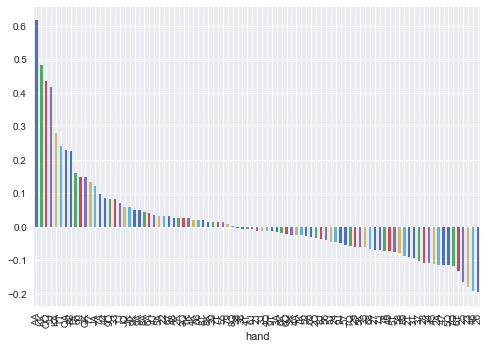

In [206]:
y.groupby('hand').mean()['delta_perc'].sort_values(ascending=False).plot.bar()
plt.savefig('out1.png')

In [169]:
counts = y.groupby('hand').count()['delta_perc']

In [186]:
z4 = y.groupby('hand').count()['delta']

In [187]:
z4 = z4.reset_index()

In [188]:
z4['c1'] = z4['hand'].apply(lambda x: c_n(x[0]))
z4['c2'] = z4['hand'].apply(lambda x: c_n(x[1]))

In [194]:

z5 = z4.sort_values(['c1', 'c2']).pivot(index='c1', columns='c2', values='delta').fillna(0)

In [195]:
z5 = np.tri(13, 13, -1) * z5.T + z5

In [270]:
z4.sum()

hand     22232425262728292A2J2K2Q2T333435363738393A3J3K...
delta                                                15874
c1                                                     546
c2                                                     910
dtype: object

In [271]:
z6 = z5 / 15874

In [274]:
p = np.zeros((13, 13))

In [275]:
p.fill(16 / 1326)

In [277]:
np.fill_diagonal(p, 6 / 1326)

In [293]:
p2 = p * np.tri(13, 13, -1)

In [296]:
p2 = p2.T

In [298]:
z8 = z6.values * np.tri(13, 13) + p2

In [302]:
p

array([[0.00452489, 0.01206637, 0.01206637, 0.01206637, 0.01206637,
        0.01206637, 0.01206637, 0.01206637, 0.01206637, 0.01206637,
        0.01206637, 0.01206637, 0.01206637],
       [0.01206637, 0.00452489, 0.01206637, 0.01206637, 0.01206637,
        0.01206637, 0.01206637, 0.01206637, 0.01206637, 0.01206637,
        0.01206637, 0.01206637, 0.01206637],
       [0.01206637, 0.01206637, 0.00452489, 0.01206637, 0.01206637,
        0.01206637, 0.01206637, 0.01206637, 0.01206637, 0.01206637,
        0.01206637, 0.01206637, 0.01206637],
       [0.01206637, 0.01206637, 0.01206637, 0.00452489, 0.01206637,
        0.01206637, 0.01206637, 0.01206637, 0.01206637, 0.01206637,
        0.01206637, 0.01206637, 0.01206637],
       [0.01206637, 0.01206637, 0.01206637, 0.01206637, 0.00452489,
        0.01206637, 0.01206637, 0.01206637, 0.01206637, 0.01206637,
        0.01206637, 0.01206637, 0.01206637],
       [0.01206637, 0.01206637, 0.01206637, 0.01206637, 0.01206637,
        0.00452489, 0.01206

In [484]:
z3

c1,2,3,4,5,6,7,8,9,T,J,Q,K,A
c2,,,,,,,,,,,,,
2,0.032362,-0.179203,-0.046300,-0.165302,-0.195242,-0.069698,-0.107870,-0.060579,-0.090787,-0.012068,-0.034964,0.025353,-0.113509
3,-0.179203,0.081326,-0.110128,-0.061224,-0.006471,-0.104053,-0.004278,0.014425,-0.092792,-0.012868,0.025064,-0.025637,-0.017438
4,-0.046300,-0.110128,0.086283,-0.110977,-0.193826,-0.113929,0.025809,-0.073234,-0.006647,0.034741,-0.014052,0.020331,-0.026022
5,-0.165302,-0.061224,-0.110977,0.012617,-0.039958,-0.056274,-0.077581,-0.026783,-0.075071,-0.044694,-0.115041,-0.060786,0.033032
6,-0.195242,-0.006471,-0.193826,-0.039958,0.019681,0.030274,-0.068138,-0.031266,-0.132795,-0.007710,-0.021076,-0.020488,0.040592
7,-0.069698,-0.104053,-0.113929,-0.056274,0.030274,0.133316,-0.072259,0.008325,0.014357,-0.071074,-0.119164,-0.026559,0.097493
8,-0.107870,-0.004278,0.025809,-0.077581,-0.068138,-0.072259,0.226617,-0.086924,0.019638,-0.038536,0.002616,0.014785,0.044402
9,-0.060579,0.014425,-0.073234,-0.026783,-0.031266,0.008325,-0.086924,0.148746,-0.014346,-0.047567,0.081686,0.050939,0.049042
T,-0.090787,-0.092792,-0.006647,-0.075071,-0.132795,0.014357,0.019638,-0.014346,0.240444,0.071626,-0.058742,0.024582,0.160008


In [520]:
z10 = z3.values

In [528]:
np.fill_diagonal(z10, 0)

In [567]:
fig, ax = plt.subplots()
im = ax.imshow(w4.values, cmap='binary', vmin=w4.values.min(), vmax=w4.values.max())
# im2 = ax[1].imshow(z6.values, vmin=z6.values.min(), vmax=z6.values.max())

# We want to show all ticks...
ax.set_xticks(np.arange(len(z6.index.values)))
ax.set_yticks(np.arange(len(z6.columns.values)))
# ... and label them with the respective list entries
ax.set_xticklabels([n_c(x) for x in z6.index.values])
ax.set_yticklabels([n_c(x) for x in z6.columns.values])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Winrate", rotation=-90, va="bottom")
ax.set_title("Observed winrate")

fig.savefig('wrbw.svg', transparent=True)
fig.savefig('wrbw.png', transparent=True)
plt.show()
plt.close(fig)

In [574]:
w4

c1,2,3,4,5,6,7,8,9,10,11,12,13,14
c2,,,,,,,,,,,,,
2,0.523364,0.309091,0.416667,0.243902,0.290698,0.367089,0.367089,0.345679,0.354839,0.387755,0.419355,0.471154,0.397112
3,0.309091,0.576271,0.390000,0.371134,0.410526,0.349057,0.506849,0.432990,0.392523,0.444444,0.433071,0.481481,0.450980
4,0.416667,0.390000,0.519685,0.328244,0.364583,0.387755,0.376344,0.351064,0.451613,0.434783,0.451613,0.480663,0.493007
5,0.243902,0.371134,0.328244,0.532787,0.369427,0.354167,0.378641,0.445545,0.409091,0.488372,0.380952,0.388128,0.486111
6,0.290698,0.410526,0.364583,0.369427,0.515385,0.462428,0.394558,0.409836,0.410256,0.447154,0.452830,0.452915,0.495935
7,0.367089,0.349057,0.387755,0.354167,0.462428,0.563910,0.419890,0.386667,0.408163,0.434783,0.394444,0.466667,0.527331
8,0.367089,0.506849,0.376344,0.378641,0.394558,0.419890,0.626866,0.373391,0.454082,0.447489,0.478723,0.485714,0.496894
9,0.345679,0.432990,0.351064,0.445545,0.409836,0.386667,0.373391,0.595420,0.430830,0.475410,0.525292,0.507576,0.511945
10,0.354839,0.392523,0.451613,0.409091,0.410256,0.408163,0.454082,0.430830,0.656934,0.485401,0.449180,0.500000,0.543956


In [571]:
np.fill_diagonal(w5, .5)

In [573]:
fig, ax = plt.subplots()
im = ax.imshow(w5, vmin=w5.min(), vmax=w5.max())
# im2 = ax[1].imshow(z6.values, vmin=z6.values.min(), vmax=z6.values.max())

# We want to show all ticks...
ax.set_xticks(np.arange(len(z6.index.values)))
ax.set_yticks(np.arange(len(z6.columns.values)))
# ... and label them with the respective list entries
ax.set_xticklabels([n_c(x) for x in z6.index.values])
ax.set_yticklabels([n_c(x) for x in z6.columns.values])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Winrate", rotation=-90, va="bottom")
ax.set_title("Observed winrate")

fig.savefig('wrnp.svg', transparent=True)
fig.savefig('wrnp.png', transparent=True)
plt.show()
plt.close(fig)

In [531]:
fig, ax = plt.subplots()
im = ax.imshow(z10, cmap='binary', vmin=z3.values.min(), vmax=z3.values.max())
# im2 = ax[1].imshow(z6.values, vmin=z6.values.min(), vmax=z6.values.max())

# We want to show all ticks...
ax.set_xticks(np.arange(len(z6.index.values)))
ax.set_yticks(np.arange(len(z6.columns.values)))
# ... and label them with the respective list entries
ax.set_xticklabels([n_c(x) for x in z6.index.values])
ax.set_yticklabels([n_c(x) for x in z6.columns.values])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("%Change", rotation=-90, va="bottom")
ax.set_title("Observed expected value")

fig.savefig('heatevnpbw.svg', transparent=True)
fig.savefig('heatevnpbw.png', transparent=True)
plt.show()
plt.close(fig)

In [509]:
fig, ax = plt.subplots(1, 2, sharey="row")
im = ax[0].imshow(np.flip(p, axis=1), vmin=z6.values.min(), vmax=z6.values.max())
im2 = ax[1].imshow(z6.values, vmin=z6.values.min(), vmax=z6.values.max())

# We want to show all ticks...
ax[0].yaxis.set_ticks_position('right')
ax[0].set_xticks(np.arange(len(z6.index.values)))
ax[1].set_xticks(np.arange(len(z6.index.values)))
ax[0].set_yticks(np.arange(len(z6.columns.values)))
# ... and label them with the respective list entries
ax[0].set_xticklabels(reversed([n_c(x) for x in z6.index.values]))
ax[1].set_xticklabels([n_c(x) for x in z6.index.values])
ax[0].set_yticklabels([n_c(x) for x in z6.columns.values])

# Rotate the tick labels and set their alignment.
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(y6.index.values)):
#     for j in range(len(y6.columns.values)):
#         text = ax.text(j, i, y6.values[i, j],
#                        ha="center", va="center", color="w")
# cbar = fig.colorbar(im, ax=ax.ravel().tolist())
# cbar.ax.set_ylabel("Count", rotation=-90, va="bottom")
# fig.set_tight_layout(False)
# cax,kw = mpl.colorbar.make_axes([ax for ax in ax.flat])
# plt.colorbar(im, cax=cax, **kw)
# cbar = fig.colorbar(im, ax=ax[2])
ax[0].set_title("Expected frequency")
ax[1].set_title("Observed frequency")
# fig.subplots_adjust(right=0.5)
# plt.tight_layout()
# cbar_ax = fig.add_axes()
# cbar_ax.ax.set_ylabel("Count", rotation=-90, va="bottom")

divider = make_axes_locatable(ax[1])
divider2 = make_axes_locatable(ax[0])
cax = divider.append_axes("right", "10%", pad="10%", add_to_figure=True)
cax2 = divider2.append_axes("right", "10%", pad="10%", add_to_figure=False)
plt.colorbar(im, cax=cax)
# fig.colorbar(im, cax=cbar_ax)
# fig.set_tight_layout
plt.tight_layout()
#plt.subplots_adjust(wspace = 0)
#plt.savefig('heatfreq.svg')
plt.savefig('heatfreq.svg', transparent=True)
plt.savefig('heatfreq.png', transparent=True)
plt.show()
plt.close(fig)


In [590]:
s0 = z6.loc[6, [6, 2, 9, 3, 8]]

In [580]:
s1 = z6.loc[2, [2, 9, 3, 8]]

In [581]:
s2 = z6.loc[9, [9, 3, 8]]

In [582]:
s3 = z6.loc[3, [3, 8]]

In [583]:
s4 = z6.loc[8, 8]

In [584]:
s5 = z6.loc[5, 7]

In [585]:
s6 = z6.loc[7, 10]

In [586]:
s7 = z6.loc[14, 14]

In [593]:
1 - (s0.sum() + s1.sum() + s2.sum() + s3.sum() + s4.sum() + s5.sum() + s6.sum() + s7.sum())

0.8665112763008693

In [499]:
plt.close('all')



In [460]:
plt.clf()
# Set up figure and image grid
fig = plt.figure(figsize=(9.75, 3))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.3,
                 share_all = True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.5,
                 )

# Add data to image grid
im = grid[0].imshow(np.flip(p, axis=1), vmin=z6.values.min(), vmax=z6.values.max())
im2 = grid[1].imshow(z6.values, vmin=z6.values.min(), vmax=z6.values.max())

grid[0].yaxis.set_ticks_position('right')
grid[0].set_xticks(np.arange(len(z6.index.values)))
grid[1].set_xticks(np.arange(len(z6.index.values)))
grid[0].set_yticks(np.arange(len(z6.columns.values)))
# ... and label them with the respective list entries
grid[0].set_xticklabels(reversed([n_c(x) for x in z6.index.values]))
grid[1].set_xticklabels([n_c(x) for x in z6.index.values])
grid[0].set_yticklabels([n_c(x) for x in z6.columns.values])

# Rotate the tick labels and set their alignment.
#plt.setp(grid[0].get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")

# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)


plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'cax'

In [379]:
from mpl_toolkits.axes_grid1 import ImageGrid

In [200]:
z4['delta'].sum()

15874

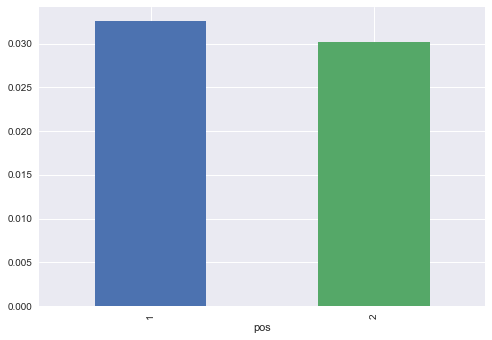

In [285]:
y.reset_index().groupby('pos').mean()['delta_perc'].plot.bar()
plt.savefig('pos_ev.png')

In [257]:
freq = counts / counts.sum()

In [274]:
import seaborn as sns

In [254]:
freq.sort_values(ascending=False).plot.bar()

NameError: name 'freq' is not defined

In [277]:
sns.heatmap(y.reset_index().set_index('hand').sort_index())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [265]:
s = freq.sort_index() * y.groupby('hand').mean()['delta_perc'].sort_index()

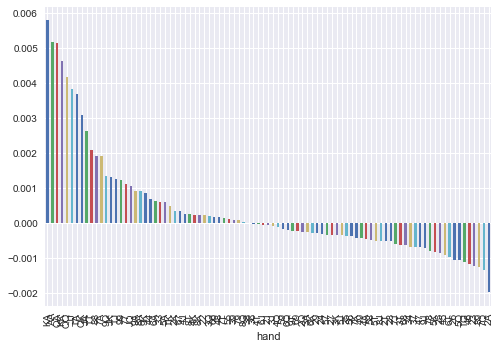

In [271]:
s.sort_values(ascending=False).plot.bar()
plt.savefig('out3.png')

In [239]:
y['delta'] = y['delta_perc']

In [240]:
pairs = y.query('c1_val == c2_val')  # ['amt']
not_pairs = y.query('c1_val != c2_val')  # ['amt']
suited = y.query('c1_suit == c2_suit')  # ['amt']
not_suited = y.query('c1_suit != c2_suit')  # ['amt']
not_suited_not_pairs = y.query('(c1_suit != c2_suit) & (c1_val != c2_val)')  # ['amt']
all_hands = y  # ['amt']

p = az.stats(pairs)
np = az.stats(not_pairs)
s = az.stats(suited)
ns = az.stats(not_suited)
nsnp = az.stats(not_suited_not_pairs)
a = az.stats(all_hands)

st = [p, np, s, ns, nsnp, a]
stdf = pd.concat(st)
labels = ['Pair', 'No Pair', 'Suited', 'Offsuit', '*Offsuit', 'All Hands']
stdf.index = pd.Index(labels)

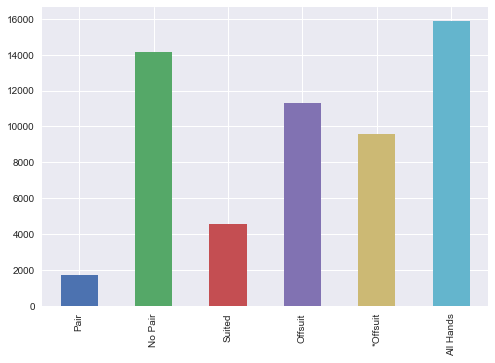

In [243]:
stdf['count'].plot.bar()

In [14]:
d['stack_perc']

144        0.365809
151        0.751313
152               1
160               1
161        0.482213
613               1
626         0.60199
636        0.732143
637               1
639               1
717        0.446281
719               1
767               1
895        0.829268
1036              1
1303      0.0533333
1311      0.0160214
1376      0.0654206
1378       0.212121
1379       0.727778
1381       0.994565
1382       0.130435
1383              1
1385      0.0594059
1386       0.126316
1387              1
1393              1
1400          0.125
1401              1
1402       0.142857
            ...    
483583     0.814815
483584            1
483785     0.455026
483791            1
483793            1
483794            1
483795            1
483796            1
483834     0.162933
483849            1
484161     0.229803
484162            1
484213            1
484219            1
484221            1
484222     0.120301
484223    0.0700389
484224     0.150628
484335     0.189711


In [36]:
plt.style.use('seaborn')

In [13]:
vis.plot_by(h.query('dealt_num == 2'), 'stack').plot.bar()

KeyError: 'stack_perc'

In [26]:
vis.plot_by(h.query('dealt_num == 2'), 'ev')
plt.legend('')

0    813
Name: count, dtype: int64
0    6777
Name: count, dtype: int64
0    2092
Name: count, dtype: int64
0    5498
Name: count, dtype: int64
0    4685
Name: count, dtype: int64
0    7590
Name: count, dtype: int64


In [35]:
hdb.roster.query('801372966')

1           5
2     Johnson
3     Schween
4       ahyde
5         drr
6         jzk
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
Name: 801372966, dtype: object

In [6]:
hdb.roster.query('timestamp == 807260508')

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
timestamp,,,,,,,,,,,,,,,,,,,,,
807260508,4,SaraK,UncleMeat,apack,doc_doc,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
hdb.player.query('timestamp == "807260508"').sort_values('pos').shape
#hdb.player.query('name == "SaraK"').query("timestamp == '807260730'")

(3, 13)

In [8]:
def bet_info(k):
    # k = hdb.hands.query('num_flop > 0').iloc[0:100, :].drop(['game_num', 'hand_num'], axis=1)
    # FOR POT SIZE
    v = k[['showdown_pot', 'river_pot', 'turn_pot', 'flop_pot']].values
    # FOR NUM PLAYERS
    vn = k[['num_showdown', 'num_river', 'num_turn', 'num_flop']].values
    v2 = pd.DataFrame(v.T).replace(to_replace=0, method='ffill').values
    vn2 = pd.DataFrame(vn.T).replace(to_replace=0, method='ffill').values
    p = pd.DataFrame(np.flip(v2.T, 1), columns=['flop_pot', 'turn_pot', 'river_pot', 'showdown_pot'])
    n = pd.DataFrame(np.flip(vn2.T, 1), columns=['num_flop', 'num_turn', 'num_river', 'num_showdown'])
    delt = p.diff(axis=1).drop('flop_pot', axis=1)
    delt.loc[:, 'flop_delta'] = p.loc[:, 'flop_pot']
    delt.columns = ['turn_delta', 'river_delta', 'showdown_delta', 'flop_delta']
    delt = delt[['flop_delta', 'turn_delta', 'river_delta', 'showdown_delta']]
    p = p.join(delt)
    j = p.join(n)
    j['flop_bet'] = j['flop_delta'] / j['num_flop']
    j['turn_bet'] = j['turn_delta'] / j['num_turn']
    j['river_bet'] = j['river_delta'] / j['num_river']
    j['showdown_bet'] = j['showdown_delta'] / j['num_showdown']
    j = j.join(k.reset_index()[['timestamp', 'dealt_num']])
    j = j.set_index('timestamp')[['dealt_num', 
                                  'num_flop', 'flop_pot', 'flop_delta', 'flop_bet',
                                  'num_turn', 'turn_pot', 'turn_delta', 'turn_bet',
                                  'num_river', 'river_pot', 'river_delta', 'river_bet',
                                  'num_showdown', 'showdown_pot', 'showdown_delta', 'showdown_bet']]
    #j = j.loc[:, 'num_flop':]
    return j

In [9]:
def bets(k, col, phase):
    x = k.reset_index()#.iloc[0, 0:3]#.set_index('num_flop', append=True)
    x1 = x[['timestamp', 'num_' + col, col + '_pot', col + '_delta', col + '_bet']]
    x1.columns = ['timestamp', 'num', 'pot', 'delta', 'bet']
    # x1.melt(id_vars='timestamp', var_name='info').
    x1 = x1.set_index('timestamp').sort_values(by='timestamp')
    x1['phase'] = phase
    x1 = x1.set_index(['phase'], append=True)
    return x1

In [10]:
def all_bets(df):
    k = bet_info(df)
    t = []
    phase = 0
    for c in ['flop', 'turn', 'river', 'showdown']:
        t.append(bets(k, c, phase))
        phase += 1
    return pd.concat(t).sort_index()

In [11]:
hdb.hands.query('dealt_num == 2 & num_flop > 0').drop(['game_num', 'hand_num'], axis=1).iloc[:, 1:9]

,num_flop,flop_pot,num_turn,turn_pot,num_river,river_pot,num_showdown,showdown_pot
timestamp,,,,,,,,
807301327,2,1280,0,0,0,0,1,2560
807301386,2,1280,0,0,0,0,1,1947
807303635,2,320,0,0,0,0,1,640
807307788,2,320,0,0,0,0,1,820
807307818,2,320,2,320,2,320,2,320
807307909,2,320,0,0,2,520,2,520
807307930,2,320,2,320,2,320,1,560
807307963,2,320,2,320,2,320,1,720
807312016,2,1920,2,3200,2,4310,2,4310


In [13]:
ab = all_bets(hdb.hands.query('dealt_num == 2 & num_flop > 0').drop(['game_num', 'hand_num'], axis=1)).apply(lambda x: pd.to_numeric(x, downcast='integer'))

In [77]:
hdb.hands.query('timestamp == "807260405"').iloc[:, 2:12]

,dealt_num,num_flop,flop_pot,num_turn,turn_pot,num_river,river_pot,num_showdown,showdown_pot,card_1
timestamp,,,,,,,,,,
807260405,4,2,840,2,840,2,840,2,1340,Kc


In [82]:
bet_info(hdb.hands.iloc[0:5,:]).iloc[:, 0:12]

,dealt_num,num_flop,flop_pot,flop_delta,flop_bet,num_turn,turn_pot,turn_delta,turn_bet,num_river,river_pot,river_delta
timestamp,,,,,,,,,,,,
807260405,4,2,840,840,420.0,2,840,0.0,0.0,2,840,0.0
807260450,4,1,240,240,240.0,1,240,0.0,0.0,1,240,0.0
807260468,4,2,1915,1915,957.5,2,1915,0.0,0.0,2,1915,0.0
807260508,4,3,480,480,160.0,1,1330,850.0,850.0,1,1330,0.0
807260570,4,2,400,400,200.0,2,400,0.0,0.0,1,800,400.0


In [ ]:
ab.query("timestamp == '")

In [23]:
#h = hdb.winning_hands().query('dealt_num == 2')
## s = hdb.player.query('dealt_num == 2').reset_index()#.reset_index()#.sort_values(['timestamp', 'pos'])
# q = s[['timestamp', 'name', 'pos', 'bet_preflop', 'bet_flop']].reset_index(drop=True).set_index(['timestamp', 'pos']).sort_index()#.sort_values('pos')#.groupby('timestamp')#.iloc[0:50, 1:11]
## x = s[['timestamp', 'name', 'pos']]
## x = x.join(s['bet_preflop'].apply(lambda g: pd.Series(list(g))))
## x = x.reset_index(drop=True).set_index(['timestamp', 'pos']).sort_index()
# x = x.loc['801373424',:]
# x['80137342']
# x = s['bet_preflop'].apply(list).apply(pd.Series, 1).stack()
# x.index = x.index.droplevel(-1)
# x.name = 'bet_preflop'
# del s['bet_preflop']
# s.join(x)
#q['turn'] = 0
#vis.plot_by(h, 'count')

In [14]:
def split_df(df):
    r = df.copy() #df.loc[:, ['bet_preflop', 'bet_flop', 'bet_turn', 'bet_river']]
    r.loc[:, ['bet_preflop', 'bet_flop', 'bet_turn', 'bet_river']] = r.loc[:, ['bet_preflop', 'bet_flop', 'bet_turn', 'bet_river']].applymap(lambda x: ','.join(x))
    return r

In [15]:
c = split_df(hdb.player.query('dealt_num == 2').reset_index())

In [16]:
def splitter(df, col):
    b = pd.DataFrame(df[col].str.split(',').tolist(), index=[df.timestamp, df.pos]).stack()
    #b.reset_index()
    b = b.reset_index()#[[0, 'bet_preflop']] # var1 variable is currently labeled 0
    b.columns = ['timestamp', 'pos', 'turn', 'action'] # renaming var1
    b = b.sort_values(['timestamp', 'turn', 'pos']).set_index(['timestamp', 'pos'])
    return b


In [17]:
def hand_hist(c):
    pf = splitter(c, 'bet_preflop')
    pf['phase'] = 0
    fl = splitter(c, 'bet_flop')
    fl['phase'] = 1
    t = splitter(c, 'bet_turn')
    t['phase'] = 2
    r = splitter(c, 'bet_river')
    r['phase'] = 3
    #pd.DataFrame.sort_index
    return pd.concat([pf, fl, t, r]).reset_index().set_index(['timestamp', 'phase', 'turn', 'pos']).sort_values(by=['timestamp', 'phase'])

In [18]:
hist = hand_hist(c)

In [20]:
vis.plot_by(ab, 'ev')

UndefinedVariableError: name 'c1_val' is not defined

In [426]:
ab.query('timestamp == 801373488')
#ab.reset_index().describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>num</th>
      <th>pot</th>
      <th>delta</th>
      <th>bet</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>phase</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="4" valign="top">801373488</th>
      <th>0</th>
      <td>2</td>
      <td>1280</td>
      <td>1280.0</td>
      <td>640.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>1280</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1920</td>
      <td>640.0</td>
      <td>640.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1920</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
</div>

In [32]:
#pd.concat([hist.reset_index(), ab.reset_index()], sort=True).set_index(['timestamp', 'phase', 'turn', 'pos']).sort_index()
hist = hand_hist(c)
hist = hist.reset_index()
hist.loc[:, 'timestamp'] = hist.loc[:, 'timestamp'].apply(lambda x: pd.to_numeric(x, downcast='integer'))
info = hist.merge(ab.reset_index(), on=['timestamp', 'phase']).set_index(['timestamp', 'phase', 'turn', 'pos'])#, 'phase_x'])#, 'turn', 'pos'])

In [33]:
i = info

In [34]:
i['to_call'] = 0

In [41]:
i

action     40920
num        40920
pot        40920
delta      40920
bet        40903
to_call    40920
dtype: int64

In [1]:
hdb.roster.query("timestamp == '801373563'")

NameError: name 'hdb' is not defined

In [99]:
hdb.player_data('sagerbot', '812529777')

dealt_num           2
pos                 1
bet_preflop        Bc
bet_flop          krA
bet_turn            -
bet_river           -
bank_start       5700
action           5700
amt              7620
card_1           None
card_2           None
delta            1920
total_delta    271600
Name: 812529777, dtype: object

In [98]:
hdb.player_data('bobk', '812529777')

dealt_num           2
pos                 2
bet_preflop        Bk
bet_flop           bf
bet_turn            -
bet_river           -
bank_start       7800
action           1920
amt                 0
card_1           None
card_2           None
delta           -1920
total_delta    653743
Name: 812529777, dtype: object

In [96]:
hdb.hands.query('timestamp == "812529777"').iloc[:, 1:12]

,hand_num,dealt_num,num_flop,flop_pot,num_turn,turn_pot,num_river,river_pot,num_showdown,showdown_pot,card_1
timestamp,,,,,,,,,,,
812529777,35,2,2,1280,0,0,0,0,1,7620,Ts


In [35]:
hdb.player_data('jzk', '801373442')

dealt_num          2
pos                2
bet_preflop       Bk
bet_flop           k
bet_turn           k
bet_river          k
bank_start      2260
action            80
amt              160
card_1            6s
card_2            7h
delta             80
total_delta    39595
Name: 801373442, dtype: object

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th>action</th>
      <th>num</th>
      <th>pot</th>
      <th>delta</th>
      <th>bet</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>phase</th>
      <th>turn</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="10" valign="top">801373442</th>
      <th rowspan="4" valign="top">0</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th>1</th>
      <td>c</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">3</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="11" valign="top">801373488</th>
      <th rowspan="4" valign="top">0</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th>1</th>
      <td>c</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">3</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>b</td>
      <td>1</td>
      <td>1160</td>
      <td>1000</td>
      <td>1000.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>f</

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(i.iloc[200:400])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th>action</th>
      <th>num</th>
      <th>pot</th>
      <th>delta</th>
      <th>bet</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>phase</th>
      <th>turn</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="10" valign="top">801373442</th>
      <th rowspan="4" valign="top">0</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th>1</th>
      <td>c</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">3</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="11" valign="top">801373488</th>
      <th rowspan="4" valign="top">0</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th>1</th>
      <td>c</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">3</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>b</td>
      <td>1</td>
      <td>1160</td>
      <td>1000</td>
      <td>1000.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>f</

In [85]:
info.query('action != "f"')

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th>action</th>
      <th>num</th>
      <th>pot</th>
      <th>delta</th>
      <th>bet</th>
      <th>to_call</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>phase</th>
      <th>turn</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="10" valign="top">801373442</th>
      <th rowspan="4" valign="top">0</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th>1</th>
      <td>c</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">3</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="10" valign="top">801373488</th>
      <th rowspan="4" valign="top">0</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>B</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th>1</th>
      <td>c</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>160</td>
      <td>80.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>k</td>
      <td>2</td>
      <td>160</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>k</td>
      <td

In [88]:
info.query('action != "f"').reset_index().groupby('timestamp').nunique().query('action == 6').iloc[0:10,:]#.count().query('action == 10')#, 'phase'])#.get_group((801373442, 0))#.sort_index()

,timestamp,phase,turn,pos,action,num,pot,delta,bet,to_call
timestamp,,,,,,,,,,
801377529,1,4,2,2,6,2,2,3,3,1
801377616,1,4,2,2,6,2,3,4,4,1
801377813,1,4,2,2,6,2,2,3,3,1
801377857,1,4,2,2,6,2,2,3,3,1
801379464,1,4,2,2,6,2,2,3,3,1
801379530,1,4,2,2,6,2,2,3,3,1
801379777,1,4,2,2,6,1,2,3,3,1
801379860,1,4,2,2,6,1,2,3,3,1
801381590,1,4,2,2,6,1,3,4,4,1


In [87]:
i.query('timestamp == 801377529')

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th>action</th>
      <th>num</th>
      <th>pot</th>
      <th>delta</th>
      <th>bet</th>
      <th>to_call</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th>phase</th>
      <th>turn</th>
      <th>pos</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="10" valign="top">801377529</th>
      <th rowspan="3" valign="top">0</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>B</td>
      <td>2</td>
      <td>1280</td>
      <td>1280</td>
      <td>640.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>r</td>
      <td>2</td>
      <td>1280</td>
      <td>1280</td>
      <td>640.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <th>1</th>
      <td>c</td>
      <td>2</td>
      <td>1280</td>
      <td>1280</td>
      <td>640.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>b</td>
      <td>1</td>
      <td>3935</td>
      <td>2655</td>
      <td>2655.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>f</td>
      <td>1</td>
      <td>3935</td>
      <td>2655</td>
      <td>2655.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <th>1</th>
      <td>A</td>
      <td>1</td>
      <td>3935</td>
      <td>2655</td>
      <td>2655.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>-</td>
      <td>1</td>
      <td>3935</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-</td>
      <td>1</td>
      <td>3935</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">3</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>-</td>
      <td>1</td>
      <td>3935</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-</td>
      <td>1</td>
      <td>3935</td>
      <td>0</td>
      <td>0.0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [38]:
# def hand_hist(d, s):
#     r = d[['timestamp', 'name', 'pos']]
#     r = r.join(d[s].apply(lambda g: pd.Series(list(g))))
#     r = r.reset_index(drop=True).set_index(['timestamp', 'pos']).sort_index()
#     return r

In [26]:
# x[:, 1] = x.iloc[:, 1] = pd.Categorical(x.iloc[:, 1:])
# x.iloc[:, 1].cat.codes


# def time_series(x):
#     # x.set_index(['timestamp', 'pos'])
#     if x.shape[0] == 2:
#         arr = np.array(list(zip(x.reset_index().values[0][2:], x.reset_index().values[1][2:])))
#         n = np.tile(arr[0], int(len(arr[2:].ravel()) / 2)).reshape(-1, 1)
#         z = np.concatenate((n, arr[2:].ravel().reshape(-1, 1)), axis=1)
#         # print(z)
#         d = pd.DataFrame(z, columns=['pos', 'action'])
#         return d.query('action != "nan"').set_index(['pos'])

In [28]:
# print(np.array(list(zip(x.reset_index().values[0][0:], x.reset_index().values[1][0:]))).reshape(-1, 1)[4:])
#print(np.array(list(zip(x.loc['801373424', :].reset_index().values[0][1:], x.loc['801373424', :].reset_index().values[1][1:]))).T)
# print(pd.Series(x.loc['801373424', :].values.T.ravel()[2:]).dropna().reset_index())
#srs = x.groupby(level=0).apply(lambda x: x.values.T.ravel())#.reset_index().set_index('timestamp')#.apply(lambda x: x)#.apply(lambda x: x.values.T.ravel()[4:])
#print(srs.apply())#[:, 0:2])
# np.dstack((arr[0:2], arr[2:]))
# arr = np.where(arr == 'nan', np.nan)
## g = pf.reset_index().groupby('timestamp')
# g.get_group('801373424').set_index(['timestamp', 'pos'])
# arr = np.array(list(zip(x.reset_index().values[0][0:], x.reset_index().values[1][0:]))))#[2:]
# n = np.tile(arr[0:3], int(len(arr[3:].ravel()) / 2))
# z = np.concatenate((n.T, arr[3:].ravel().reshape(-1, 1)), axis=1)
# d = pd.DataFrame(z, columns=['timestamp', 'pos', 'name', 'action'])
# d.query('action != "nan"').set_index(['timestamp', 'pos'])
## p = g.apply(lambda x: time_series(x))
#print(z)
# pd.DataFrame(z).dropna()
# np.vstack((n, arr[2:])).reshape((-1, 2))

In [36]:
#h.query("c1_val == c2_val").head()#.plot.scatter(y="delta")
plt.clf()
# h.pos = h.pos.apply(pd.to_numeric)
# h.delta = h.delta.apply(pd.to_numeric)
# g = h.set_index('pos').sort_index()
g = h[['pos', 'delta']].groupby('pos').mean()
f = h.query('delta > 0')[['pos', 'delta']].groupby('pos').count()
# z = h.query('')
#g = h.sort_values('pos').set_index('pos')
g.plot(kind='bar')
f.plot(kind='bar')
# vis.plot_by(g, 'winrate')
# vis.plot_by(g, 'winrate')
#h[['pos', 'delta']].plot.bar(x='pos', height='delta')#x='pos')#, y='delta')
plt.show()
# az.stats(g[1])
# d1 = az.stats(g.loc[1.0, :])
# d2 = az.stats(g.loc[2.0, :])
# d = pd.concat([d1, d2])



In [5]:
h.sort_values.set_index('name').iloc[0:10]

AttributeError: 'function' object has no attribute 'set_index'

In [36]:
plt.clf()
vis.plot_by(h, 'ev')

0    11888
Name: count, dtype: int64
0    56571
Name: count, dtype: int64
0    20902
Name: count, dtype: int64
0    47557
Name: count, dtype: int64
0    35669
Name: count, dtype: int64
0    68459
Name: count, dtype: int64


In [19]:
np.unique(hdb.player.reset_index().set_index('name').index.values).size

1289

In [28]:
np.unique(h.reset_index().set_index('name').index.values).size

1126

In [56]:
a = h.reset_index().groupby('name').count().sort_values('timestamp', ascending=False).iloc[0:225, 0]
a.sum()

73190

In [20]:
# Total number of games where hands were shown
numGamesShown = len(h['timestamp'].unique())
print(numGamesShown)

45258


In [23]:
# Total number of hands that were shown
numTotalShown = h.count()[0]
print(numTotalShown)

97398


In [24]:
# Games shown out of all games
print(numGamesShown / hdb.hands.shape[0])

0.37941065515362365


In [13]:
# Hands shown per game
print(numTotalShown / hdb.hands.shape[0])

0.7868316936016937


In [21]:
# Hands shown out of all hands
print(numTotalShown / hdb.hands['dealt_num'].sum())

NameError: name 'numTotalShown' is not defined

In [1]:
h = hdb

NameError: name 'hdb' is not defined

In [39]:
h.player.head()


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>dealt_num</th>
      <th>pos</th>
      <th>bet_preflop</th>
      <th>bet_flop</th>
      <th>bet_turn</th>
      <th>bet_river</th>
      <th>bank_start</th>
      <th>action</th>
      <th>amt</th>
      <th>card_1</th>
      <th>card_2</th>
      <th>delta</th>
      <th>total_delta</th>
    </tr>
    <tr>
      <th>name</th>
      <th>timestamp</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">dingbot</th>
      <th>818553530</th>
      <td>11</td>
      <td>7</td>
      <td>c</td>
      <td>f</td>
      <td>-</td>
      <td>-</td>
      <td>10000</td>
      <td>175</td>
      <td>0</td>
      <td>None</td>
      <td>None</td>
      <td>-175</td>
      <td>-175</td>
    </tr>
    <tr>
      <th>818553604</th>
      <td>11</td>
      <td>6</td>
      <td>f</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>9825</td>
      <td>0</td>
      <td>0</td>
      <td>None</td>
      <td>None</td>
      <td>0</td>
      <td>-175</td>
    </tr>
    <tr>
      <th>818553689</th>
      <td>11</td>
      <td>5</td>
      <td>f</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>9825</td>
      <td>0</td>
      <td>0</td>
      <td>None</td>
      <td>None</td>
      <td>0</td>
      <td>-175</td>
    </tr>
    <tr>
      <th>818553781</th>
      <td>9</td>
      <td>3</td>
      <td>cc</td>
      <td>k</td>
      <td>kf</td>
      <td>-</td>
      <td>9825</td>
      <td>300</td>
      <td>0</td>
      <td>None</td>
      <td>None</td>
      <td>-300</td>
      <td>-475</td>
    </tr>
    <tr>
      <th>818553926</th>
      <td>9</td>
      <td>3</td>
      <td>f</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>9525</td>
      <td>0</td>
      <td>0</td>
      <td>None</td>
      <td>None</td>
      <td>0</td>
      <td>-475</td>
    </tr>
  </tbody>
</table>
</div>

In [18]:
# We found that theres an extremely low rate of hands shown in NoLimit poker. 
# About 8.5% out of all games in our sample show hands, and 6.4% out of all hands are shown.
# This may be problematic and require further research or consideration into widening our scope
# from just NoLimit poker, where there are much much larger datasets.
0    3130
Name: count, dtype: int64
0    18667
Name: count, dtype: int64
0    6802
Name: count, dtype: int64
0    14995
Name: count, dtype: int64
0    11865
Name: count, dtype: int64
0    21797
Name: count, dtype: int64

0    13954
Name: count, dtype: int64
0    83444
Name: count, dtype: int64
0    30880
Name: count, dtype: int64
0    66518
Name: count, dtype: int64
0    52564
Name: count, dtype: int64
0    97398
Name: count, dtype: int64